### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
df1 = pd.read_csv('../../02_Daten/Validierung/1.csv', sep=',')
df2 = pd.read_csv('../../02_Daten/Validierung/2.csv', sep=',')
df3 = pd.read_csv('../../02_Daten/Validierung/3.csv', sep=',')
df4 = pd.read_csv('../../02_Daten/Validierung/4.csv', sep=',')
df5 = pd.read_csv('../../02_Daten/Validierung/5.csv', sep=',')

C:\Users\pauls\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\pauls\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dfs = [df1,df2,df3,df4,df5]

### Datensätze kennenlernen

was bedeutet assemblyGroup

df2 und df5 haben identische Spalten -> Status und Temperatur

bei df1 sind noch kraft und weg dabei

bei df3 zusätzlich drehmoment und winkel

um was für Datensätze handelt es sich bei Temperatur, Kraft, Weg etc.

df4 so wie wir es kennen mit vielen NaNs + live-leck

In [4]:
# Richtige Zeit für alle Einträge
for i in dfs:
    i['date'] = [datetime.utcfromtimestamp(x/1000) for x in i['timestamp']]
    display(i.head())

,timestamp,identnummer,messenaktiv,status,iomaster,assemblyGroup,kraft,temperatur,weg,date
0,1667775600000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,False,0,False,2.0,0.0,24.218724,0.0,2022-11-06 23:00:00
1,1667775601000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,False,0,False,2.0,0.0,24.218724,0.0,2022-11-06 23:00:01
2,1667775602000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,False,0,False,2.0,0.0,24.218724,0.0,2022-11-06 23:00:02
3,1667775603000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,False,0,False,2.0,0.0,24.218724,0.0,2022-11-06 23:00:03
4,1667775604000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,False,0,False,2.0,0.0,24.218724,0.0,2022-11-06 23:00:04


,timestamp,identnummer,messenaktiv,status,iomaster,assemblyGroup,temperatur,date
0,1667775600000,NaN,False,0,False,NaN,23.990476,2022-11-06 23:00:00
1,1667775601000,NaN,False,0,False,NaN,23.785794,2022-11-06 23:00:01
2,1667775602000,NaN,False,0,False,NaN,23.944152,2022-11-06 23:00:02
3,1667775603000,NaN,False,0,False,NaN,23.828318,2022-11-06 23:00:03
4,1667775604000,NaN,False,0,False,NaN,23.992934,2022-11-06 23:00:04


,timestamp,identnummer,messenaktiv,status,iomaster,assemblyGroup,kraft,weg,drehmoment,winkel,temperatur,date
0,1667775600000,NaN,False,0,False,NaN,0.0,0.0,0.0,0.0,24.001393,2022-11-06 23:00:00
1,1667775601000,NaN,False,0,False,NaN,0.0,0.0,0.0,0.0,24.121280,2022-11-06 23:00:01
2,1667775602000,NaN,False,0,False,NaN,0.0,0.0,0.0,0.0,24.022880,2022-11-06 23:00:02
3,1667775603000,NaN,False,0,False,NaN,0.0,0.0,0.0,0.0,24.023260,2022-11-06 23:00:03
4,1667775604000,NaN,False,0,False,NaN,0.0,0.0,0.0,0.0,24.123360,2022-11-06 23:00:04


,timestamp,identnummer,assemblyGroup,iomaster,messenaktiv,handaktiv,druck,temperatur,leck,liveleck,...,rework_label,configuration_label,repair_label,maintenance_label_cleaning,rework_label_assembly_error,repair_label_change_dichtring,configuration_label_druck_change_5,configuration_label_druck_change_6,configuration_label_druck_change_7,date
0,1667775600000,NaN,NaN,False,False,False,5.419293,23.925303,0.0,0.0,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:00:00
1,1667775601000,NaN,NaN,False,False,False,4.437359,24.078188,0.0,0.0,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:00:01
2,1667775602000,NaN,NaN,False,False,False,4.854461,23.977208,0.0,0.0,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:00:02
3,1667775603000,NaN,NaN,False,False,False,5.028491,23.983130,0.0,0.0,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:00:03
4,1667775604000,NaN,NaN,False,False,False,4.439437,23.937964,0.0,0.0,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:00:04


,timestamp,identnummer,messenaktiv,status,iomaster,assemblyGroup,temperatur,date
0,1667775600000,NaN,False,0,False,NaN,24.062492,2022-11-06 23:00:00
1,1667775601000,NaN,False,0,False,NaN,23.887059,2022-11-06 23:00:01
2,1667775602000,NaN,False,0,False,NaN,24.019393,2022-11-06 23:00:02
3,1667775603000,NaN,False,0,False,NaN,23.932032,2022-11-06 23:00:03
4,1667775604000,NaN,False,0,False,NaN,23.831947,2022-11-06 23:00:04


In [5]:
for i in dfs:
    print(len(i))
    print("Startdatum:", min(i.date))
    print("Enddatum:", max(i.date))

1968607
Startdatum: 2022-11-06 23:00:00
Enddatum: 2022-11-29 23:00:00
1968788
Startdatum: 2022-11-06 23:00:00
Enddatum: 2022-11-29 23:00:00
1968971
Startdatum: 2022-11-06 23:00:00
Enddatum: 2022-11-29 23:00:00
1969156
Startdatum: 2022-11-06 23:00:00
Enddatum: 2022-11-29 23:00:00
1969679
Startdatum: 2022-11-06 23:00:00
Enddatum: 2022-11-29 23:00:00


In [6]:
for i in dfs:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968607 entries, 0 to 1968606
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   identnummer    object        
 2   messenaktiv    bool          
 3   status         int64         
 4   iomaster       bool          
 5   assemblyGroup  float64       
 6   kraft          float64       
 7   temperatur     float64       
 8   weg            float64       
 9   date           datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 123.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968788 entries, 0 to 1968787
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   identnummer    object        
 2   messenaktiv    bool          
 3   status         int64         
 4   iomaster       bool          
 5   assembly

In [7]:
for i in dfs:
    print(i.isnull().sum())

timestamp             0
identnummer      667060
messenaktiv           0
status                0
iomaster              0
assemblyGroup    667060
kraft                 0
temperatur            0
weg                   0
date                  0
dtype: int64
timestamp             0
identnummer      680097
messenaktiv           0
status                0
iomaster              0
assemblyGroup    680097
temperatur            0
date                  0
dtype: int64
timestamp             0
identnummer      693162
messenaktiv           0
status                0
iomaster              0
assemblyGroup    693162
kraft                 0
weg                   0
drehmoment            0
winkel                0
temperatur            0
date                  0
dtype: int64
timestamp                                   0
identnummer                            706609
assemblyGroup                          706609
iomaster                                    0
messenaktiv                                 0
handaktiv  

In [8]:
df4.dropna(axis=1).head(20)

,timestamp,iomaster,messenaktiv,handaktiv,druck,temperatur,leck,liveleck,status,maintenance_label_cleaning,rework_label_assembly_error,repair_label_change_dichtring,configuration_label_druck_change_5,configuration_label_druck_change_6,configuration_label_druck_change_7,date
0,1667775600000,False,False,False,5.419293,23.925303,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:00
1,1667775601000,False,False,False,4.437359,24.078188,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:01
2,1667775602000,False,False,False,4.854461,23.977208,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:02
3,1667775603000,False,False,False,5.028491,23.983130,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:03
4,1667775604000,False,False,False,4.439437,23.937964,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:04
5,1667775605000,False,False,False,5.307189,24.047758,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:05
6,1667775606000,False,False,False,4.380661,24.043664,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:06
7,1667775607000,False,False,False,4.674435,24.070864,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:07
8,1667775608000,False,False,False,4.701270,23.967502,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:08
9,1667775609000,False,False,False,4.991986,24.008052,0.0,0.0,0,False,False,False,False,False,False,2022-11-06 23:00:09


In [12]:
df4[df4.assemblyGroup.isnull()==False]

,timestamp,identnummer,assemblyGroup,iomaster,messenaktiv,handaktiv,druck,temperatur,leck,liveleck,...,rework_label,configuration_label,repair_label,maintenance_label_cleaning,rework_label_assembly_error,repair_label_change_dichtring,configuration_label_druck_change_5,configuration_label_druck_change_6,configuration_label_druck_change_7,date
206,1667775807000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,2.0,False,False,False,4.552801,24.004845,0.0,0.000000,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:03:27
207,1667775808000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,2.0,False,False,False,4.252930,24.004845,0.0,0.000000,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:03:28
208,1667775809000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,2.0,False,False,False,5.006592,24.004845,0.0,0.000000,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:03:29
209,1667775810000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,2.0,False,False,False,5.112202,24.004845,0.0,0.000000,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:03:30
210,1667775811000,cb2fd416-8f2d-45f6-9660-6df56a6dd2f5,2.0,False,False,False,4.935559,24.004845,0.0,0.000000,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-06 23:03:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969151,1669762796000,d8a7411e-5ea4-4958-b171-77a16a068c41,3.0,False,True,False,5.668804,24.017771,0.0,-5.199465,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-29 22:59:56
1969152,1669762797000,d8a7411e-5ea4-4958-b171-77a16a068c41,3.0,False,True,False,4.435486,24.017771,0.0,-1.553291,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-29 22:59:57
1969153,1669762798000,d8a7411e-5ea4-4958-b171-77a16a068c41,3.0,False,True,False,4.614135,24.017771,0.0,-1.553291,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-29 22:59:58
1969154,1669762799000,d8a7411e-5ea4-4958-b171-77a16a068c41,3.0,False,True,False,4.480499,24.017771,0.0,-1.553291,...,NaN,NaN,NaN,False,False,False,False,False,False,2022-11-29 22:59:59


In [13]:
df4.assemblyGroup.value_counts()

3.0    422309
1.0    420363
2.0    419875
Name: assemblyGroup, dtype: int64

In [15]:
df4.iomaster.value_counts()

False    1966981
True        2175
Name: iomaster, dtype: int64

In [22]:
df4.repair_label_change_dichtring.value_counts()

False    1968556
True         600
Name: repair_label_change_dichtring, dtype: int64

### Messwerte über Zeitraum plotten

df4

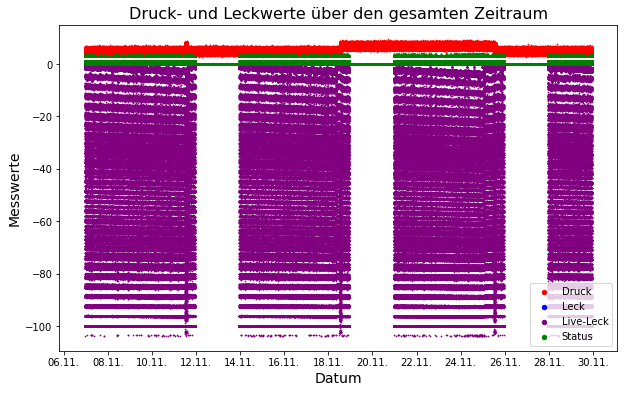

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df4.date, df4.druck, color='red', label='Druck', s=0.5)
ax.scatter(df4.date, df4.leck, color='blue', label='Leck', s=0.5)
ax.scatter(df4.date, df4.liveleck, color='purple', label='Live-Leck', s=0.5)
ax.scatter(df4.date, df4.status, color='green', label='Status', s=0.5)

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
ax.xaxis.set_major_formatter(date_form)

ax.set_title("Druck- und Leckwerte über den gesamten Zeitraum", fontsize=16)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Messwerte", fontsize=14)

lgnd = plt.legend(loc=4, numpoints=1, fontsize=10)

#change the marker size manually for lines
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
lgnd.legendHandles[3]._sizes = [20]

df2 und df5

In [10]:
temp = [df2, df5]

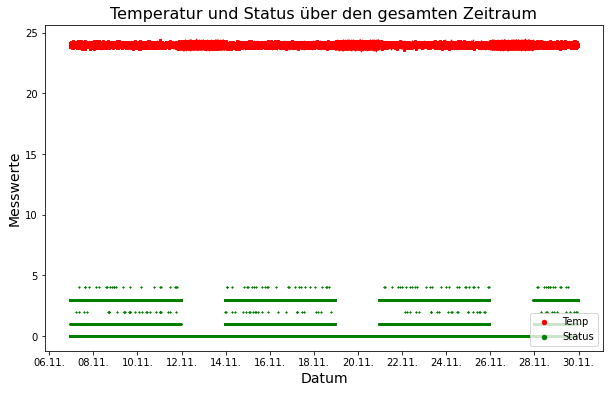

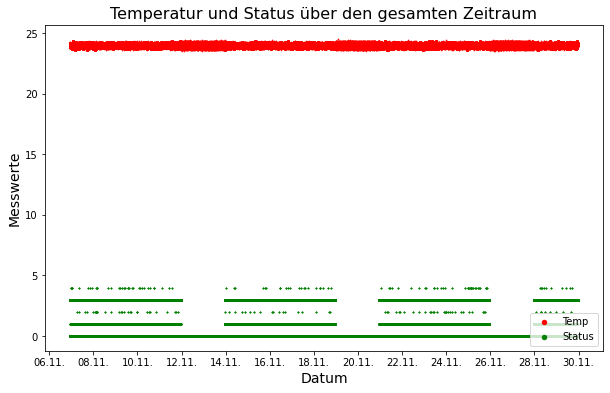

In [11]:
for i in temp:
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(i.date, i.temperatur, color='red', label='Temp', s=0.5)
    ax.scatter(i.date, i.status, color='green', label='Status', s=0.5)

    date_form = DateFormatter("%d.%m.")
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
    ax.xaxis.set_major_formatter(date_form)

    ax.set_title("Temperatur und Status über den gesamten Zeitraum", fontsize=16)
    ax.set_xlabel("Datum", fontsize=14)
    ax.set_ylabel("Messwerte", fontsize=14)

    lgnd = plt.legend(loc=4, numpoints=1, fontsize=10)

    #change the marker size manually for lines
    lgnd.legendHandles[0]._sizes = [20]
    lgnd.legendHandles[1]._sizes = [20]
    #lgnd.legendHandles[2]._sizes = [20]
    #lgnd.legendHandles[3]._sizes = [20]